  # 📌 Klasifikasi Pendapatan dengan Naive Bayes dan Logistic Regression
  Pada tugas ini, kita akan menggunakan Adult Census Income Dataset. Dataset bisa diakses melalui link berikut:\
  🔗 https://www.kaggle.com/datasets/uciml/adult-census-income/data

  Tujuan utama dari tugas ini adalah membangun model Naive Bayes dan Logistic Regression untuk memprediksi apakah pendapatan seseorang lebih dari $50K per tahun berdasarkan fitur demografis dan pekerjaan.

  Langkah-langkah yang harus dilakukan antara lain:
  1. Persiapan Dataset & Eksplorasi Awal
  - Memuat dataset, melihat struktur data, tipe fitur (numerik atau kategorikal), dan distribusi label.

  2. Preprocessing
  - Memproses data agar siap untuk digunakan dalam model, termasuk menangani missing value, encoding fitur kategorikal, dan normalisasi/standardisasi jika diperlukan.

  3. Eksperimen Model 
  - Bangun model Naive Bayes dan Logistic Regression dan latih menggunakan data training.
  - Eksperimen dapat dilakukan dengan pemilihan fitur yang digunakan dalam melatih model untuk mengetahui pengaruh fitur terhadap performa model.

  4. Evaluasi Model
  - Hitung metrik evaluasi seperti Accuracy, Precision, Recall, F1-Score, serta visualisasikan Confusion Matrix untuk setiap kombinasi fitur yang diuji.

  5. Analisis & Kesimpulan
  - Membandingkan performa antar eksperimen fitur, menentukan kombinasi fitur terbaik, dan menarik kesimpulan mengenai pengaruh fitur terhadap kemampuan model dalam memprediksi pendapatan.

# 1. Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 2. Load Dataset




In [2]:
df = pd.read_csv('dataset/adult.csv')

# 3. Eksplorasi Data


In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [5]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


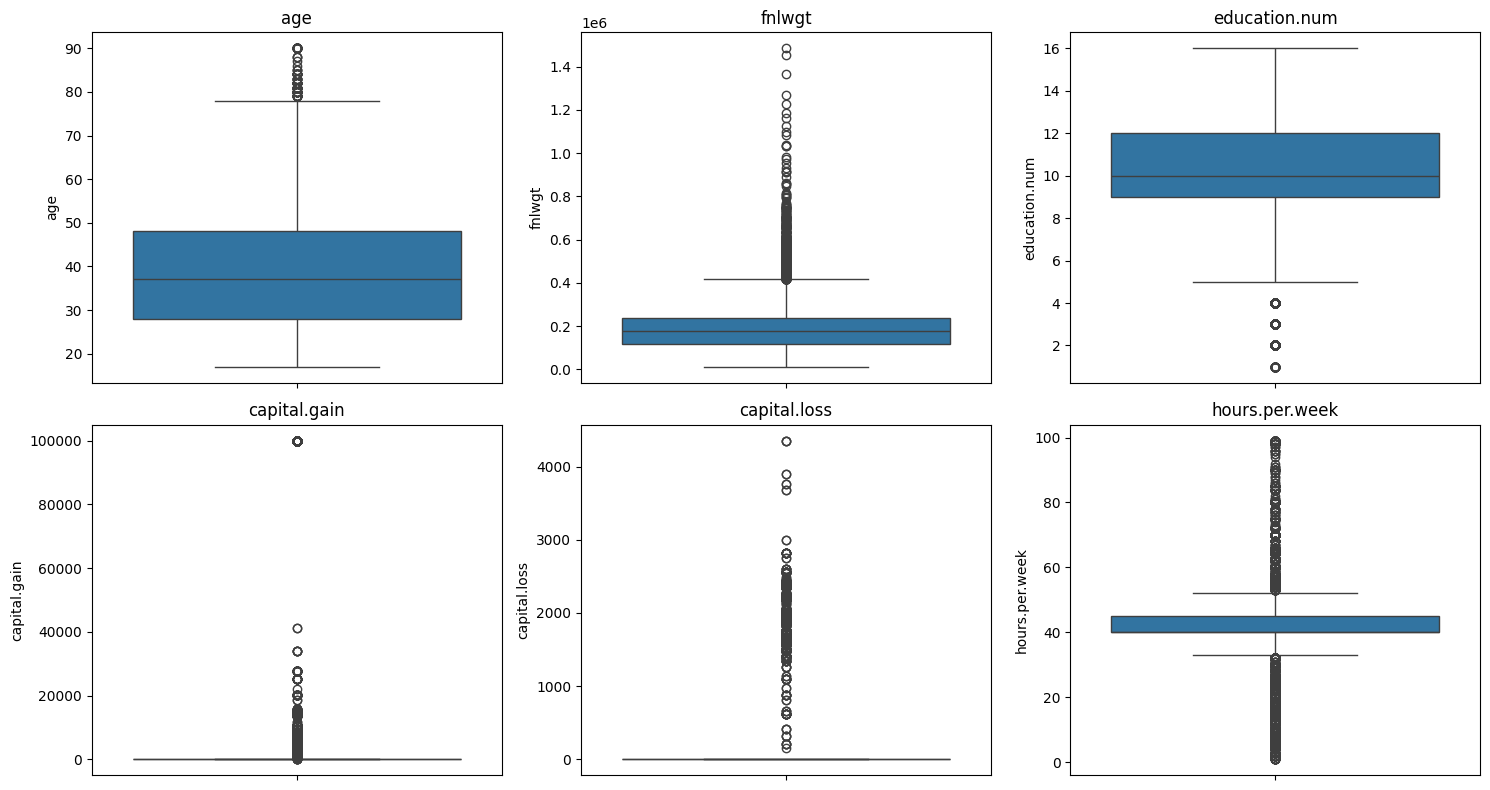

In [7]:
kolom_numerik = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
fig, axes = plt.subplots(2, 3, figsize=(15,8))
axes = axes.flatten()

for i, col in enumerate(kolom_numerik):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].tick_params(axis='x')  # miring per subplot
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

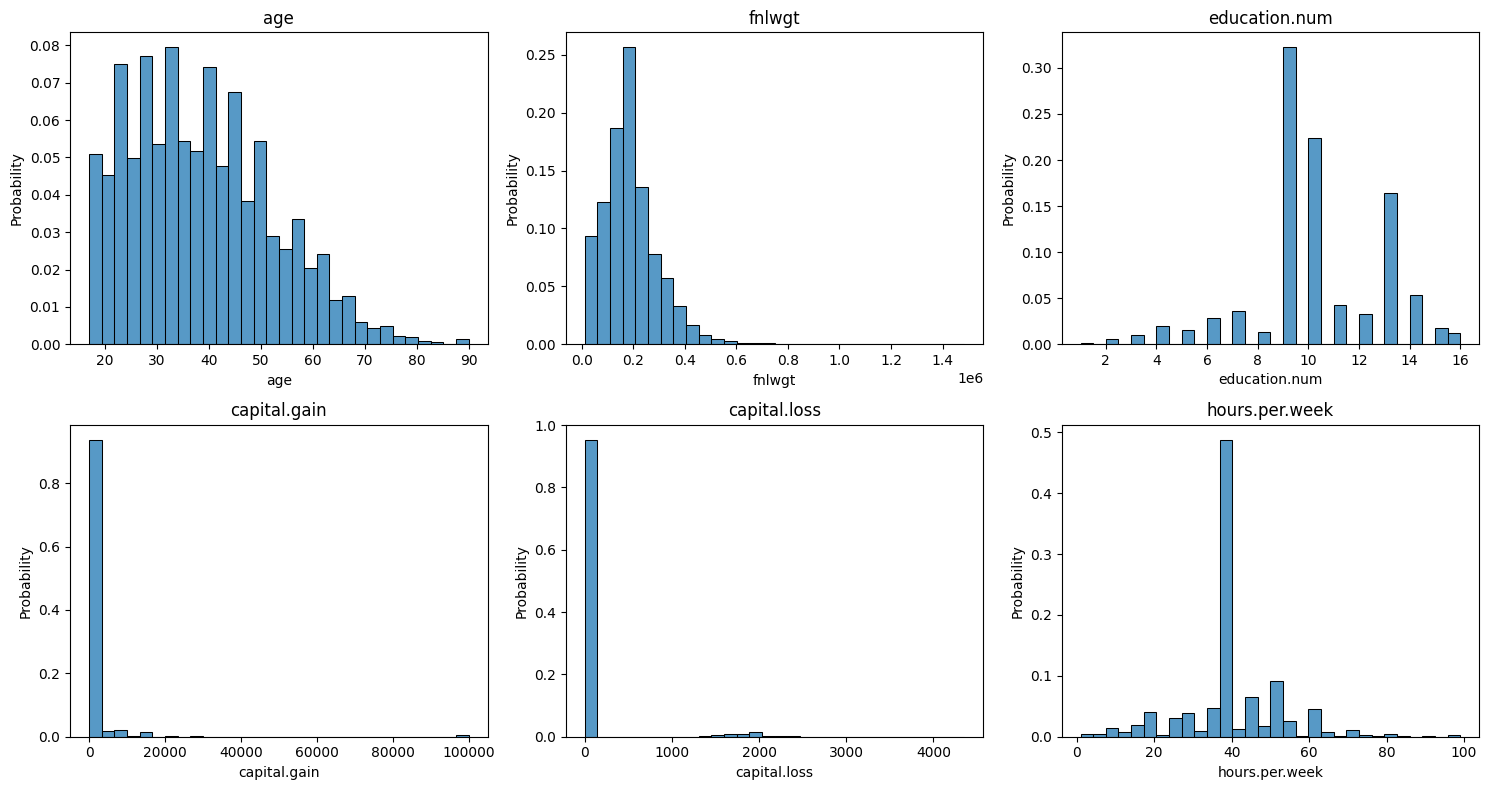

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(15,8))
axes = axes.flatten()

for i, col in enumerate(kolom_numerik):
    sns.histplot(df[col], ax=axes[i], stat='probability', bins=30)
    axes[i].tick_params(axis='x')  # miring per subplot
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

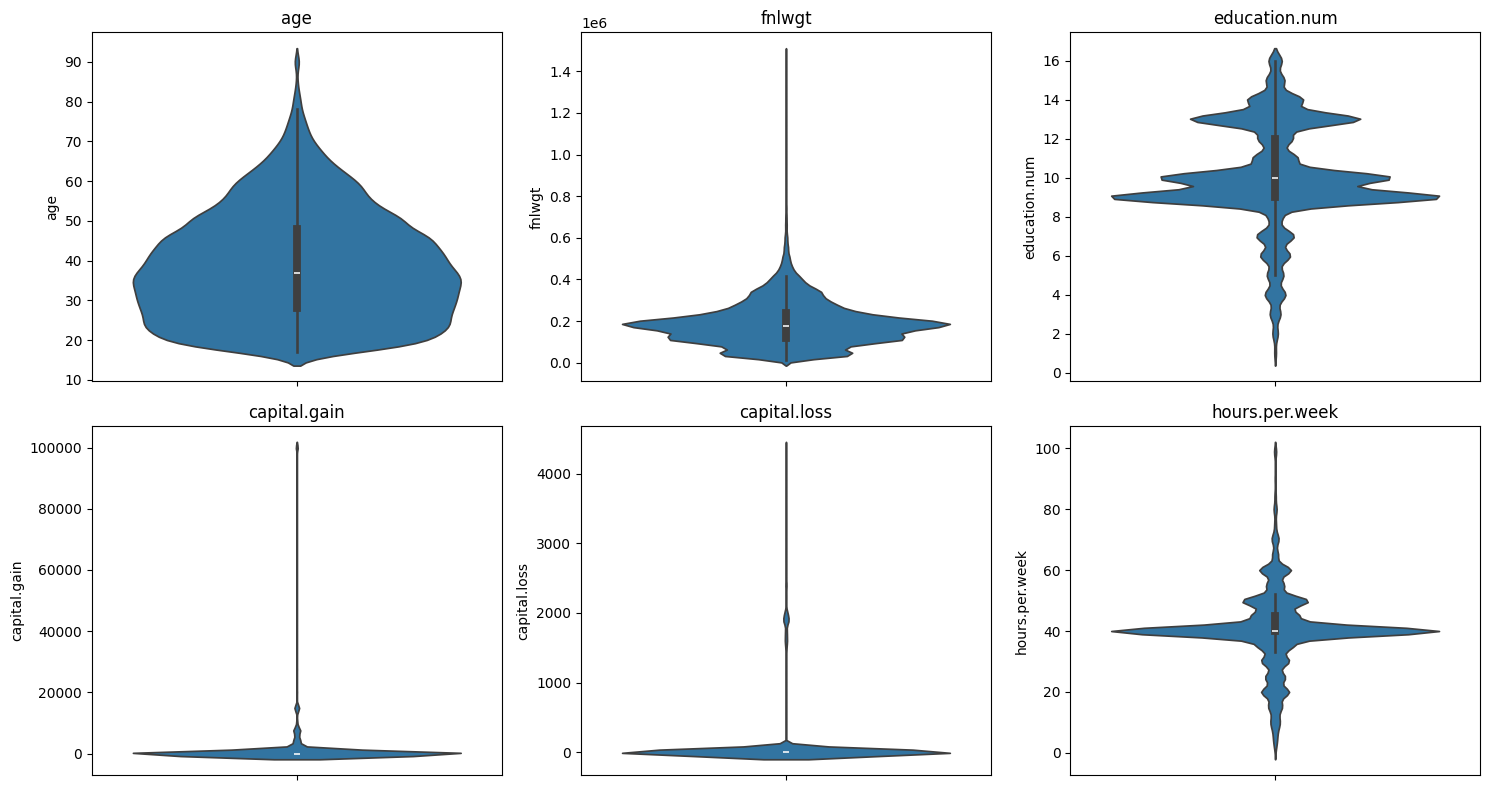

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15,8))
axes = axes.flatten()

for i, col in enumerate(kolom_numerik):
    sns.violinplot(df[col], ax=axes[i])
    axes[i].tick_params(axis='x')  # miring per subplot
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

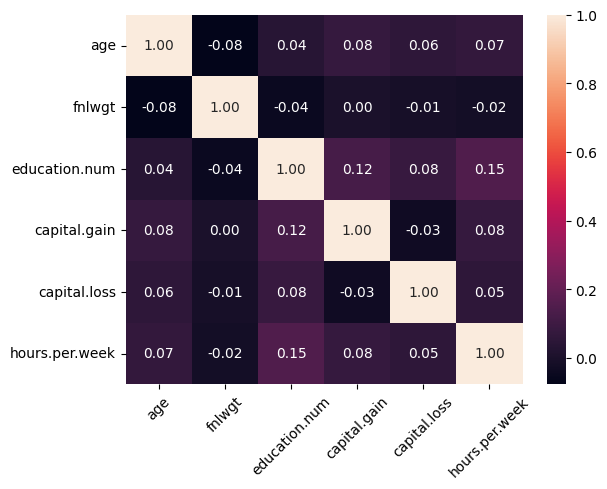

In [10]:
korelasi = df[kolom_numerik].corr(method='pearson')
sns.heatmap(korelasi, annot=True, fmt='.2f')
plt.xticks(rotation=45)
plt.show()

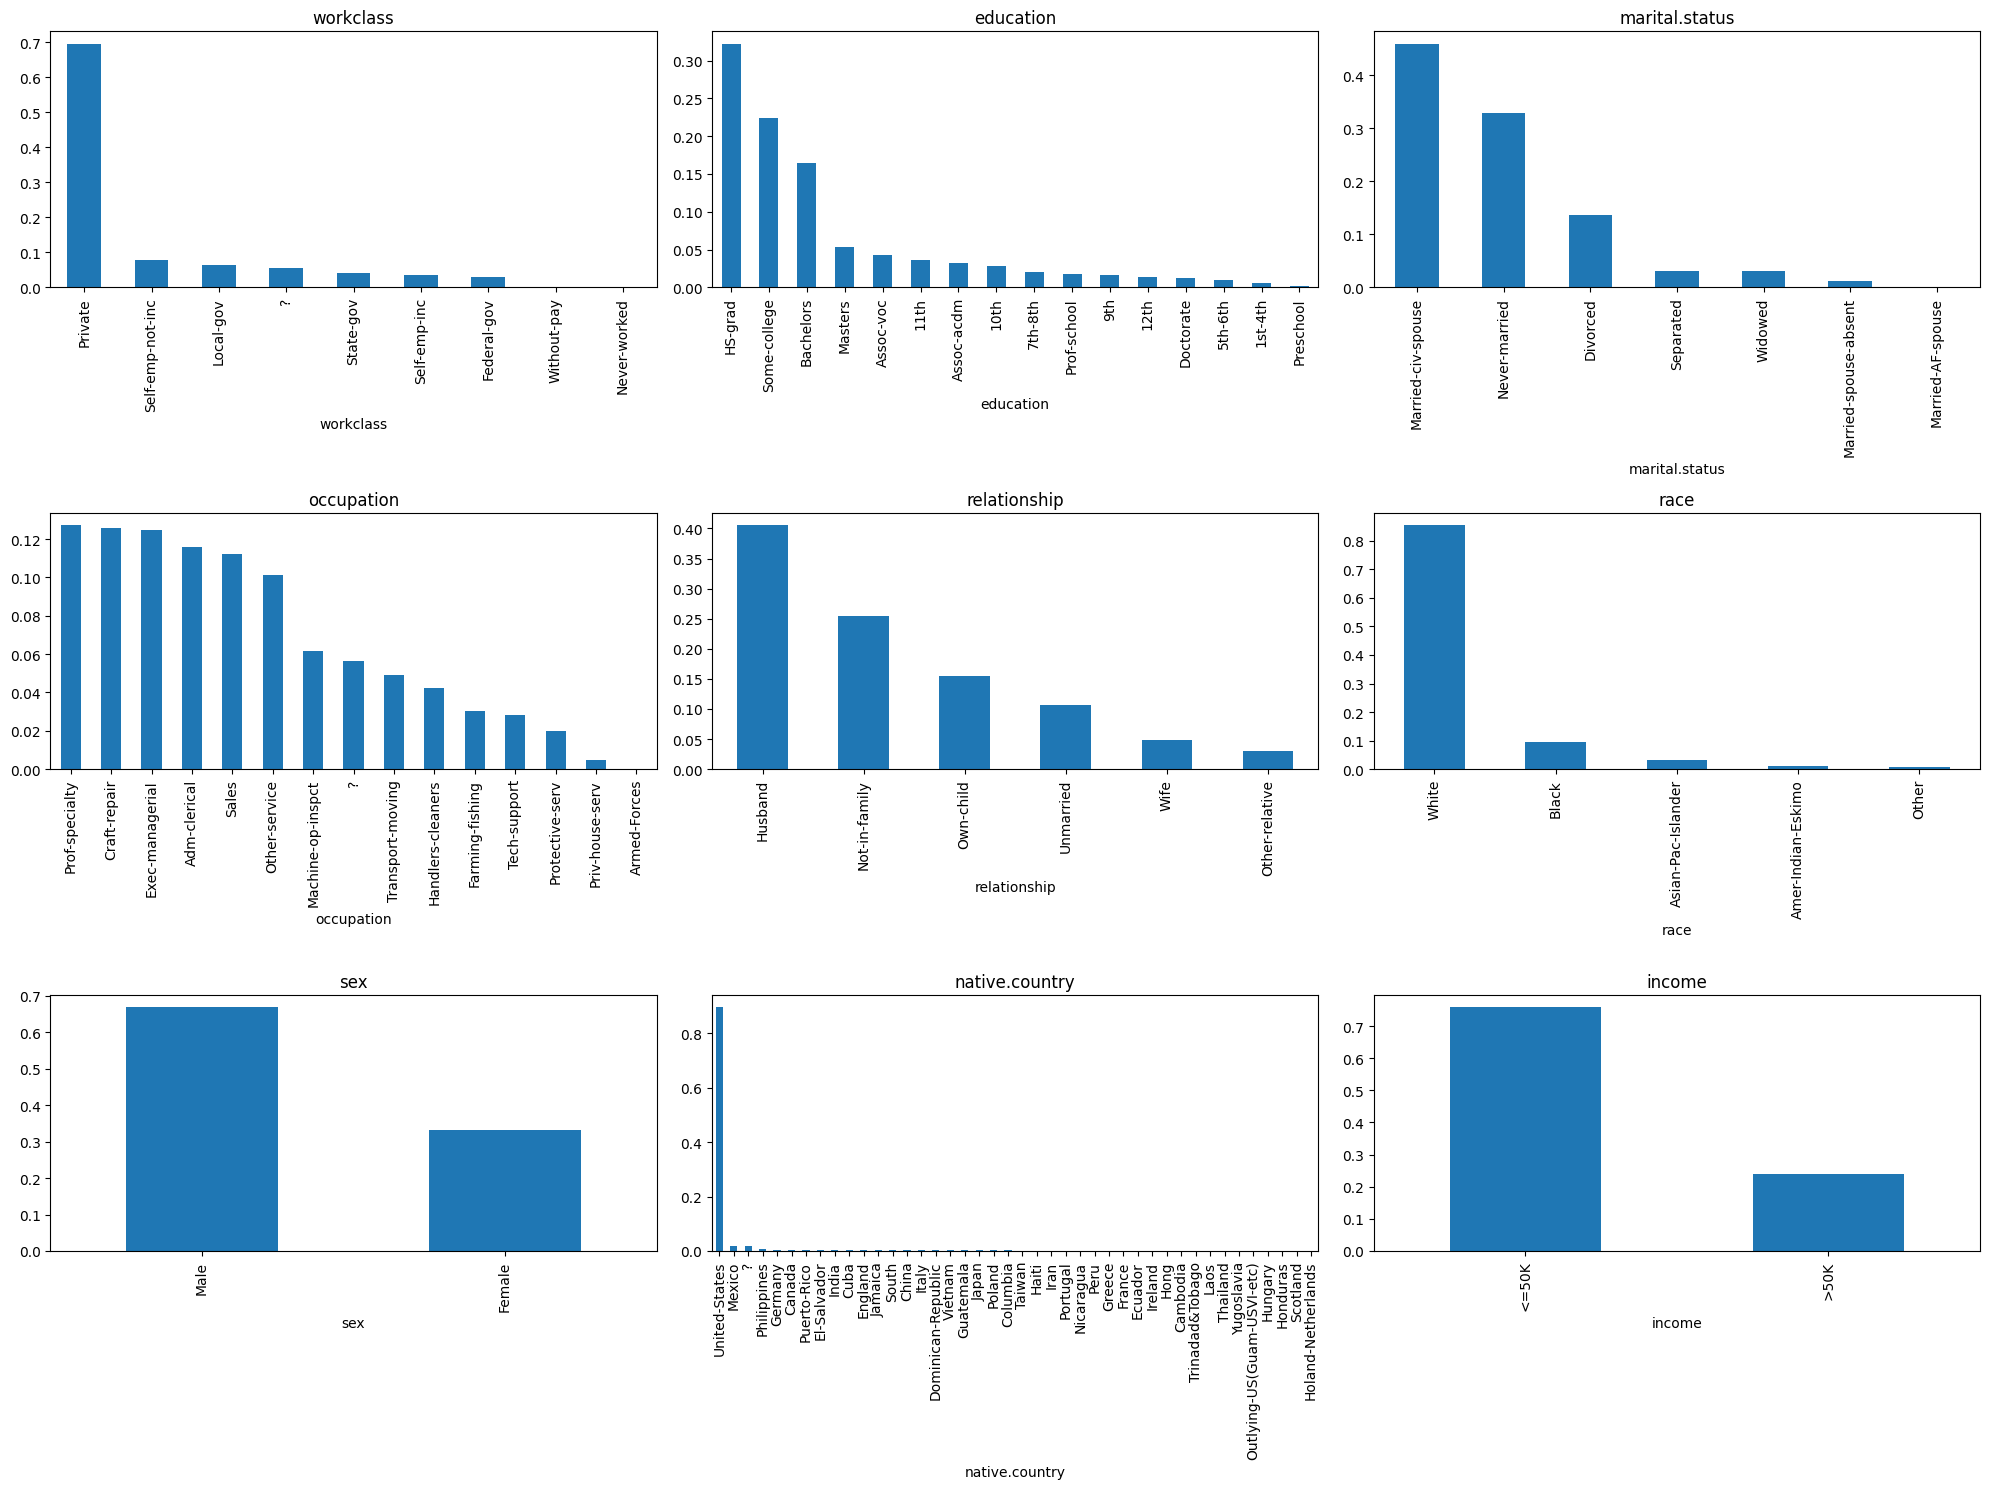

In [11]:
kolom_kategorikal =  df.select_dtypes(include=['object']).columns.tolist()
fig, axes = plt.subplots(3, 3, figsize=(20,15))
axes = axes.flatten()

for i, col in enumerate(kolom_kategorikal):
    df[col].value_counts(normalize=True).plot(kind='bar', ax=axes[i])
    axes[i].tick_params(axis='x', rotation=90)  # miring per subplot
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [12]:
for col in kolom_kategorikal:
    print(df[col].value_counts(normalize=True))
    print('-'*40)

workclass
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: proportion, dtype: float64
----------------------------------------
education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: proportion, dtype: float64
----------------------------------------
marital.status
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed             

# 4. Data Cleaning & Preprocessing

In [13]:
# bikin data pada kolom kategorikal yang proporsinya < 1% menjadi others
for col in kolom_kategorikal: 
    proporsi = df[col].value_counts(normalize=True)
    small_proporsi = proporsi[proporsi < 0.01].index
    df[col] = df[col].replace(small_proporsi, 'others')
    print(df[col].value_counts(normalize=True))
    print('-'*40)

workclass
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
others              0.000645
Name: proportion, dtype: float64
----------------------------------------
education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
others          0.006726
Name: proportion, dtype: float64
----------------------------------------
marital.status
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
others

In [14]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [15]:
kolom_ada_q = ['occupation', 'native.country', 'workclass']  # cari yang ada '?'

for c in kolom_ada_q:
    count = (df[c] == '?').sum()
    proportion = count / len(df)
    print(f"Kolom '{c}' memiliki {count} nilai '?' yang merupakan {proportion:.2%} dari total data.")

Kolom 'occupation' memiliki 1843 nilai '?' yang merupakan 5.66% dari total data.
Kolom 'native.country' memiliki 583 nilai '?' yang merupakan 1.79% dari total data.
Kolom 'workclass' memiliki 1836 nilai '?' yang merupakan 5.64% dari total data.


In [16]:
df[kolom_ada_q] = df[kolom_ada_q].replace('?', np.nan)

In [17]:
for col in kolom_ada_q:
    df[col + '_miss'] = df[col].isna().astype(int)

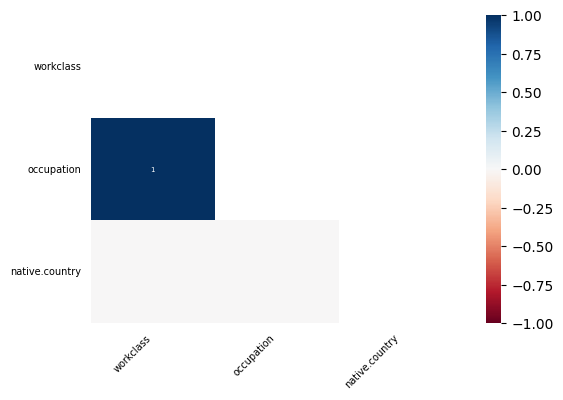

In [18]:
msno.heatmap(df, figsize=(6,4), fontsize=7)      # korelasi antar missing
plt.show()

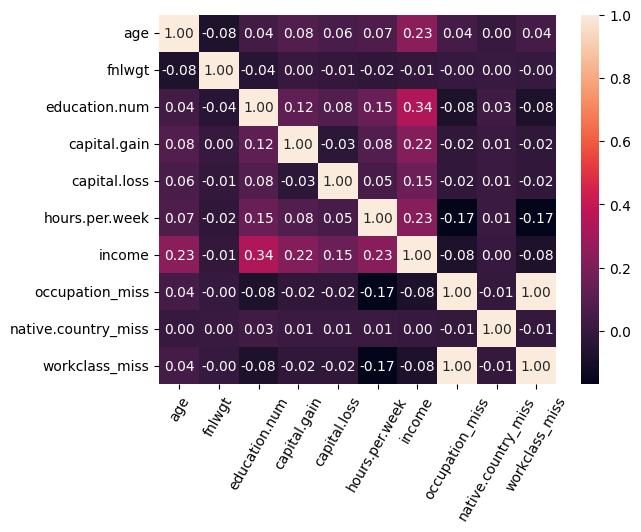

In [19]:
korelasi = df[df.select_dtypes(include=['int64', 'float64']).columns.tolist()].corr(method='pearson')
sns.heatmap(korelasi, annot=True, fmt='.2f')
plt.xticks(rotation=60)
plt.show()

In [20]:
df[kolom_ada_q] = df[kolom_ada_q].fillna('missing')

In [21]:
df['occupation_workclass_missing'] = ((df['occupation'] == 'missing') & (df['workclass'] == 'missing')).astype(int)
df = df.drop(columns=['workclass_miss', 'occupation_miss'])

In [22]:
for c in df.select_dtypes(include=['int64', 'float64']).columns:
    q1 = df[c].quantile(0.01)
    q99 = df[c].quantile(0.99)
    df[c] = df[c].clip(q1, q99)

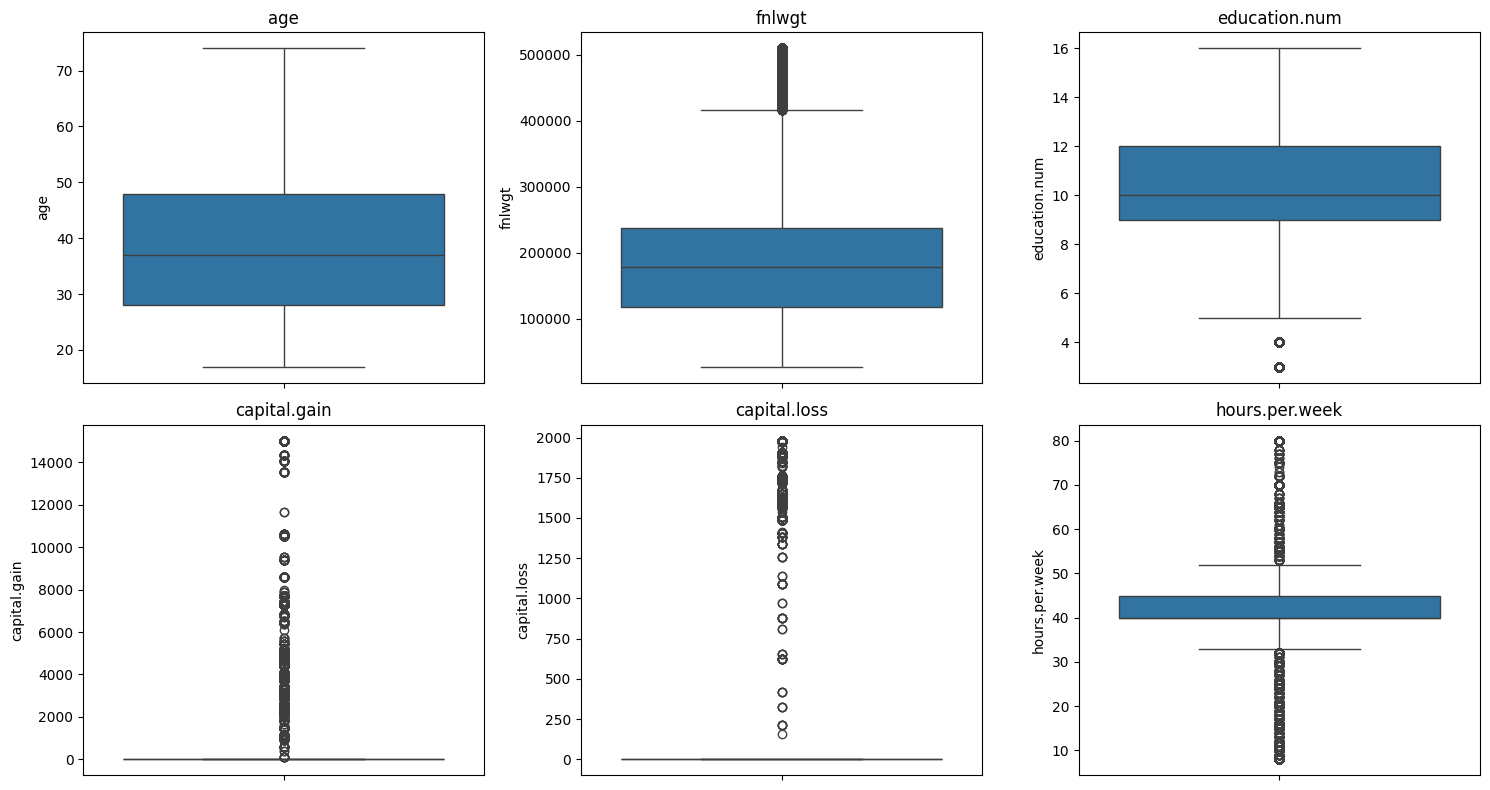

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(15,8))
axes = axes.flatten()

for i, col in enumerate(kolom_numerik):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].tick_params(axis='x')  # miring per subplot
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [24]:
df.drop(columns=['education', 'fnlwgt'], inplace=True) # karena education == education.num dan fnlwgt tidak penting untuk klasifikasi income

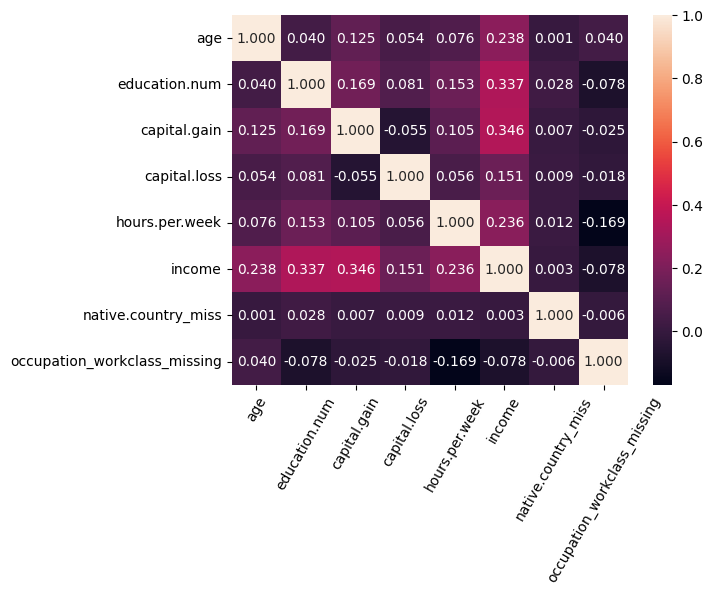

In [25]:
korelasi = df[df.select_dtypes(include=['int64', 'float64']).columns.tolist()].corr(method='pearson')
sns.heatmap(korelasi, annot=True, fmt='.3f')
plt.xticks(rotation=60)
plt.show()

# 5. Feature Engineering & Selection

In [26]:
x = df.drop(columns='income')
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)

# 6. Training

In [27]:
num_cols = x.select_dtypes(include=['float64', 'int64']).columns
cat_cols = x.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ])

preprocessor_gnb = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)

preprocessor_nb = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ])


pipe_logres = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])
pipe_logres.fit(X_train, y_train)
y_pred_logres = pipe_logres.predict(X_test)


pipe_gnb = Pipeline([
    ('preprocessor', preprocessor_gnb),
    ('model', GaussianNB())
])
pipe_gnb.fit(X_train, y_train)
y_pred_gnb = pipe_gnb.predict(X_test)


pipe_mnb = Pipeline([
    ('preprocessor', preprocessor_nb),
    ('model', MultinomialNB())
])
pipe_mnb.fit(X_train, y_train)
y_pred_mnb = pipe_mnb.predict(X_test)


pipe_bnb = Pipeline([
    ('preprocessor', preprocessor_nb),
    ('model', BernoulliNB())
])
pipe_bnb.fit(X_train, y_train)
y_pred_bnb = pipe_bnb.predict(X_test)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 14), (6513, 14), (26048,), (6513,))

# 7. Evaluation

In [29]:
print("Accuracy logres:", accuracy_score(y_test, y_pred_logres))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logres))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logres))

Accuracy logres: 0.8533701827115001

Confusion Matrix:
 [[4599  346]
 [ 609  959]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      4945
           1       0.73      0.61      0.67      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513



In [30]:
print("Accuracy gaussianNB:", accuracy_score(y_test, y_pred_gnb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gnb))

Accuracy gaussianNB: 0.7643175188085368

Confusion Matrix:
 [[3662 1283]
 [ 252 1316]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.74      0.83      4945
           1       0.51      0.84      0.63      1568

    accuracy                           0.76      6513
   macro avg       0.72      0.79      0.73      6513
weighted avg       0.83      0.76      0.78      6513



In [31]:
print("Accuracy multinomialNB:", accuracy_score(y_test, y_pred_mnb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_mnb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_mnb))

Accuracy multinomialNB: 0.7653922923384001

Confusion Matrix:
 [[3776 1169]
 [ 359 1209]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.76      0.83      4945
           1       0.51      0.77      0.61      1568

    accuracy                           0.77      6513
   macro avg       0.71      0.77      0.72      6513
weighted avg       0.82      0.77      0.78      6513



In [32]:
print("Accuracy bernouliNB:", accuracy_score(y_test, y_pred_bnb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bnb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bnb))

Accuracy bernouliNB: 0.7414401965300169

Confusion Matrix:
 [[3616 1329]
 [ 355 1213]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      4945
           1       0.48      0.77      0.59      1568

    accuracy                           0.74      6513
   macro avg       0.69      0.75      0.70      6513
weighted avg       0.81      0.74      0.76      6513



# 8. Kesimpulan

Berdasarkan model dan prediksi di atas menggunakan logistic regression, multinomialNB, gaussianNB, bernouliNB, dapat kita simpulkan untuk memprediksi target yang sifatnya biner atau yes or no, model logistic regression adalah model terbaik untuk digunakan, karena memiliki nilai macro avg paling tinggi, yaitu 0.85 dan akurasi 0.85.